
**************************************************
                 Loading Dataset                  
**************************************************


**************************************************
                  Splitting Data                  
**************************************************


**************************************************
                Training the Model                
**************************************************


**************************************************
                Model Performance                 
**************************************************

Mean Squared Error (MSE): 0.66
R-squared (R^2): 0.50


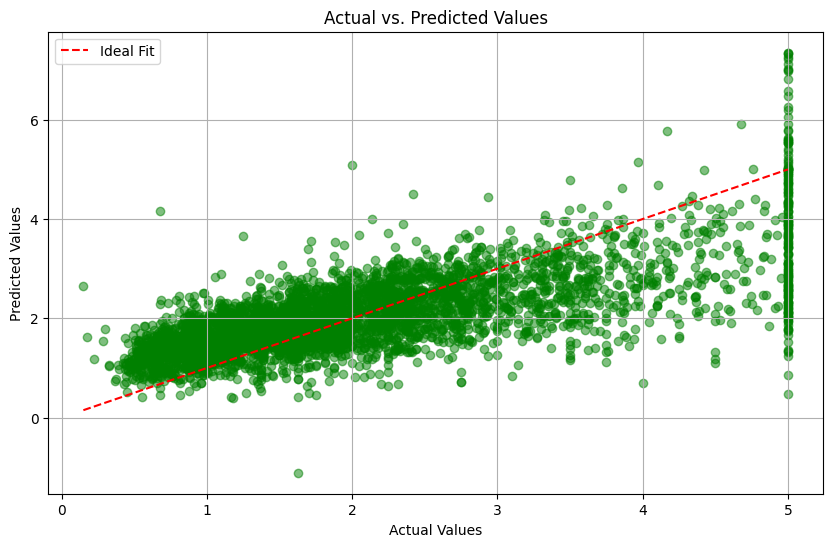


**************************************************
                  Prediction CLI                  
**************************************************

Example Input: 3.5, 6.0, 3.0, 20
Enter values for MedInc, AveRooms, AveOccup, HouseAge (comma-separated).
Type 'exit' to quit.
Your Input: 2
Please enter 4 values separated by commas.
Your Input: 3.5,6.0,3,2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Median House Value: 1.44
Your Input: ASDF
Invalid input. Please enter numeric values separated by commas.
Your Input: 6,6.5,2,3,5
Please enter 4 values separated by commas.
Your Input: 6,6.5,2,3,5.1
Please enter 4 values separated by commas.
Your Input: 6,6.5,2,3,5,1
Please enter 4 values separated by commas.
Your Input: 6,6,4,2,3,5
Please enter 4 values separated by commas.
Your Input: 3.5,6.0,3,2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Median House Value: 1.44
Your Input: 2,6,5,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Median House Value: 0.74
Your Input: EXIT

**************************************************
                 Exiting Program                  
**************************************************



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Add some decorative separators
def print_decorated(message):
    print("\n" + "*" * 50)
    print(f"{message.center(50)}")
    print("*" * 50 + "\n")

# Load the California Housing dataset
print_decorated("Loading Dataset")
data = fetch_california_housing(as_frame=True)
housing_df = data['frame']

# Feature and target selection
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']  # Selecting multiple features
X = housing_df[features]  # Selecting features
y = housing_df['MedHouseVal']  # Selecting 'Median House Value' as the target

# Split the data into training and testing sets
print_decorated("Splitting Data")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
print_decorated("Training the Model")
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print_decorated("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Visualize actual vs. predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Add CLI for predictions with Google Colab compatibility
def prediction_cli():
    print_decorated("Prediction CLI")
    print("Example Input: 3.5, 6.0, 3.0, 20")
    print("Enter values for MedInc, AveRooms, AveOccup, HouseAge (comma-separated).")
    print("Type 'exit' to quit.")

    while True:
        user_input = input("Your Input: ")
        if user_input.lower() == 'exit':
            print_decorated("Exiting Program")
            break
        try:
            values = list(map(float, user_input.split(',')))
            if len(values) != len(features):
                print(f"Please enter {len(features)} values separated by commas.")
                continue
            prediction = model.predict([values])[0]
            print(f"Predicted Median House Value: {prediction:.2f}")
        except ValueError:
            print("Invalid input. Please enter numeric values separated by commas.")

# Call prediction CLI for user interaction
prediction_cli()
